In [2]:
import pandas as pd
import numpy as np
from load_mg_data import load_microgrid_data
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
dir = '../data/CityLearn2021-data/'
df = load_microgrid_data(dir)
df = df.iloc[0:24*365*3,:]

In [4]:
df.columns

Index(['Month', 'Hour', 'DayType', 'DaylightSavings', 'Load', 'SolarGen',
       'Price', 'Outdoor Drybulb Temperature [C]',
       'Outdoor Relative Humidity [%]', 'Diffuse Solar Radiation [W/m2]',
       'Direct Solar Radiation [W/m2]',
       '6h Prediction Outdoor Drybulb Temperature [C]',
       '12h Prediction Outdoor Drybulb Temperature [C]',
       '24h Prediction Outdoor Drybulb Temperature [C]',
       '6h Prediction Outdoor Relative Humidity [%]',
       '12h Prediction Outdoor Relative Humidity [%]',
       '24h Prediction Outdoor Relative Humidity [%]',
       '6h Prediction Diffuse Solar Radiation [W/m2]',
       '12h Prediction Diffuse Solar Radiation [W/m2]',
       '24h Prediction Diffuse Solar Radiation [W/m2]',
       '6h Prediction Direct Solar Radiation [W/m2]',
       '12h Prediction Direct Solar Radiation [W/m2]',
       '24h Prediction Direct Solar Radiation [W/m2]'],
      dtype='object')

In [5]:
df['DayType']

0        Holiday
1        Holiday
2        Holiday
3        Holiday
4        Holiday
          ...   
35035        Sun
35036        Sun
35037        Sun
35038        Sun
35039        Sun
Name: DayType, Length: 35040, dtype: category
Categories (8, object): ['Fri', 'Holiday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [6]:
day_types=['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Holiday']

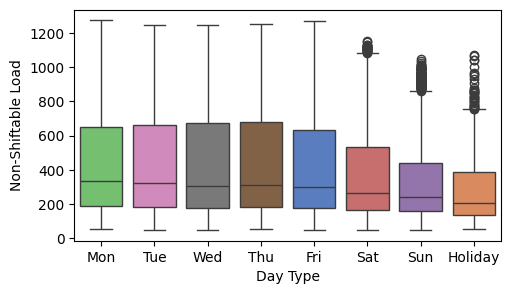

In [100]:
plt.figure(figsize=(5.5,3))
sns.boxplot(x='DayType', y='Load', hue='DayType', data=df 
            ,order=day_types
            ,palette='muted'
            )
plt.ylabel('Non-Shiftable Load')
plt.xlabel('Day Type')
#plt.title('',fontsize=12, fontweight='bold')
plt.savefig('./plots/TX_boxplot.svg', format='svg')

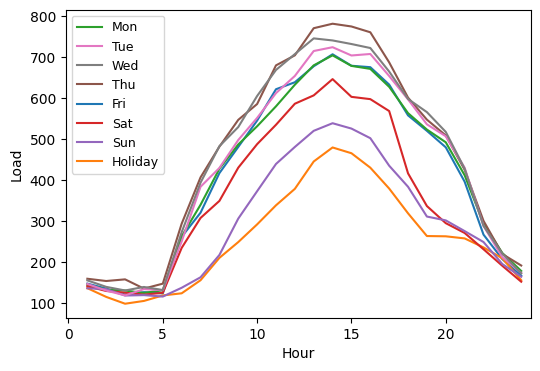

<Figure size 640x480 with 0 Axes>

In [101]:
# plt.figure(figsize=(6,4))
# for day_type in day_types:
#     df_daytype = pd.DataFrame(df[df['DayType']==day_type].groupby('Hour')['Load'].median())
#     sns.lineplot(x='Hour', y='Load', data=df_daytype,label=day_type)
    
# plt.legend(loc='upper left',fontsize=9)
# plt.xlim(xmax=24.5)
# plt.show()


plt.figure(figsize=(6,4))
df_plt = df.groupby(['Hour','DayType'],observed=False)['Load'].median()
sns.lineplot(x='Hour',y='Load',hue='DayType',data=df
             ,estimator=np.median
             ,errorbar=None
             )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(day_type)] for day_type in day_types]
           ,day_types,loc='upper left',fontsize=9)
plt.xlim(xmax=24.5)
plt.show()
plt.savefig('./plots/TX_byhour_bydaytype.svg', format='svg')